### Linear Regression Modeling Lab

This lab will walk you through the basics of building a linear regression model out of a training and test set using a variety of techniques, including:

 - estimating distributional fit
 - onehot and target encoding
 - measuring progress with cross validation scores
 - creating a custom loss function
 - properly using inferences from the training set to transform the test set
 
**Some of these columns might have missing values.  Decide on the best approach for filling them in based on what we did from last class.**

#### Step 1).  Upload the training and test set from the `\movies` folder inside the `\Data` folder

In [1]:
# your code here

import pandas as pd
import numpy as np

train = pd.read_csv("/Users/bianca/Documents/GitHub/DAT-10-14/class material/Unit3/data/movies/train.csv",parse_dates=['release_year'])
test = pd.read_csv("/Users/bianca/Documents/GitHub/DAT-10-14/class material/Unit3/data/movies/test.csv", parse_dates=['release_year'])

In [2]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

#### Step 2).  Using a Custom Loss Function

To avoid some of the pitfalls of using a loss function that measures squared error, we're going to modify it a little bit.  This is also a useful skill in practice because lots of projects will require something precise that's not available out-of-the-box in a library.

`Scitkit-Learn` allows for custom loss functions relatively easily

We're going to instead use the **mean squared log error**.  It has the following form:

$$ \frac{\sum{log_{e}(y - \bar{y})^2}}{n} $$

The easiest way to do this is the following:

 - take the log of y using `np.log1p` to avoid the hassles of dealing with negative values
 - fit your model to that, and then calculate the resulting mean squared error
 
So your job is two fold:
 - log transform the target variable (revenue)
 - create a function called `mean_squared_log_error` according to the specifications defined here:  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html, under the heading for the `scoring` argument
 - to test that you did this correctly, run a 10-fold univariate linear regression on the training set using the `popularity` column as `X` and `revenue` as y.  The correct value should be 60.7.

In [34]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [35]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

In [36]:
# log transformed the target variable
train['revenue_log'] = np.log1p(train['revenue'])

In [38]:
X_train = train[['popularity']]
y_train = train[['revenue_log']]

In [39]:
#scorer(estimator, X, y)
def mean_squared_log_error(model,X,y):
    error = model.predict(X)-y
    mse = np.mean(error**2)
    return mse

In [40]:
scores = cross_val_score(estimator = lreg,X=X_train, y=y_train, cv=10, scoring=mean_squared_log_error)

In [41]:
np.mean(scores)

60.73027393164422

#### Step 3).  Distributional Inference of Your Continuous Variables

This dataset is far from normal.  Use the `probplot()` method to find the *least* normal variable among your numeric variables, judging by the r-squared value of the resulting line.  

Then, see if log-transforming improves its behavior at all.  Use a comparison between your validation scores in a univariate regression between the treated and untreated versions of the variable as your indicator of whether or not this made anything better.

In [43]:
train.dtypes

id                               int64
popularity                     float64
budget                           int64
original_title                  object
cast                            object
homepage                        object
director                        object
tagline                         object
keywords                        object
overview                        object
runtime                          int64
genres                          object
production_companies            object
release_date                    object
vote_count                       int64
vote_average                   float64
release_year            datetime64[ns]
budget_adj                     float64
revenue                        float64
revenue_log                    float64
dtype: object

In [ ]:
# your code here
def show_distribution_numeric_variables()
    for index in train.loc[index]:
        if train.loc['index'] == 'float64'
        vals, model = probplot(train['revenue'], plot=plt);

(0.5800209126522571, 0.6009993374689825, 0.7759321140913117)

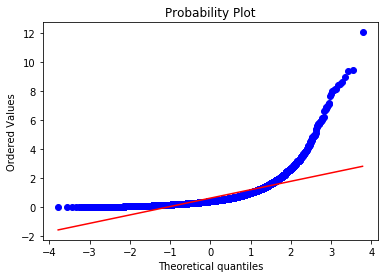

In [54]:
vals, model = probplot(train['popularity'], plot=plt);
model

(22611249.701404847, 15104928.043424312, 0.7484030236487506)

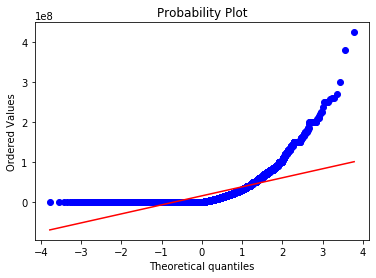

In [55]:
vals_2, model_2 = probplot(train['budget'], plot=plt);
model_2

(25.84822019588308, 103.2156553124295, 0.7979080090154935)

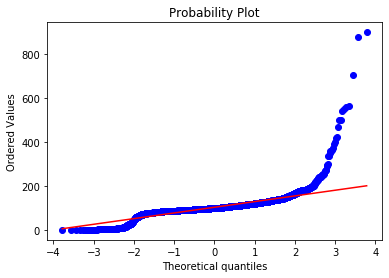

In [56]:
vals_3, model_3 = probplot(train['runtime'], plot=plt);
model_3

(317.1854691762457, 197.17933679223992, 0.5965756297041135)

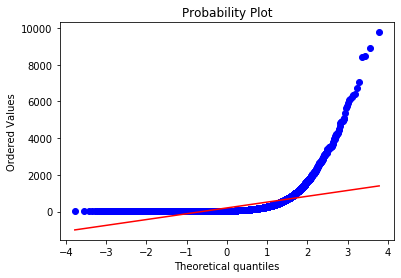

In [57]:
vals_4, model_4 = probplot(train['vote_count'], plot=plt);
model_4

(0.8969423835073336, 5.991901646740357, 0.9934328572787294)

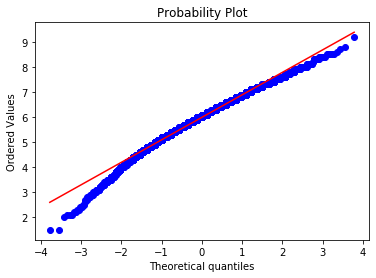

In [59]:
vals_6, model_6 = probplot(train['vote_average'], plot=plt);
model_6

(317.1854691762457, 197.17933679223992, 0.5965756297041135)

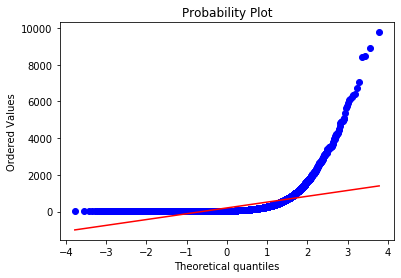

In [58]:
vals_5, model_5 = probplot(train['vote_count'], plot=plt);
model_5

(27169197.00354639, 18897268.73330457, 0.7803944624567354)

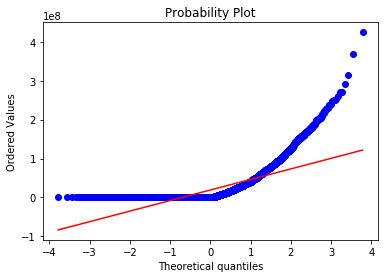

In [60]:
vals_7, model_7 = probplot(train['budget_adj'], plot=plt);
model_7

In [117]:
train['vote_count_log']=np.log1p(train['vote_count'])

In [118]:
X_train_1 = train[['vote_count']]
y_train_1 = train[['revenue_log']]

In [119]:
scores = cross_val_score(estimator = lreg,X=X_train_1, y=y_train_1, cv=10, scoring=mean_squared_log_error)

In [120]:
np.mean(scores)

65.94013966051395

In [121]:
X_train_2 = train[['vote_count_log']]
y_train_1 = train[['revenue_log']]

In [122]:
scores_2 = cross_val_score(estimator = lreg,X=X_train_2, y=y_train_1, cv=10, scoring=mean_squared_log_error)

In [123]:
np.mean(scores_2)

44.4699238212142

#### Step 4).  Encoding the `Director` Column

The `Director` column is a good example of some of the challenges of dealing with categorical data.  If George Lucas or Steven Spielberg direct a film, there's a good chance that has a non-random impact on a film's bottom line.  However, there are a lot of unique values, most of which are probably non-impactful.  

Creating a column for everyone is probably not a good idea, but there's also no clear 'order' you could assign them just by looking at their labels.  

In this step you're going to try two different techniques to see which one works better on your dataset.

**Technique 1:**  Only include directors that have a value count of at least 10 *in your training set*, and set everything else to other.  

So:

 - transform the column accordingly (you can make a new column if that's easier)
 - transform the same column in your test set so that if a director's name *doesn't* appear in your new training column it gets set to `Other`

In [153]:
director_count = train.groupby('director')['director'].transform('count')

In [165]:
train['director_top_10'] = np.where(director_count > 10, train['director'], 'Other')

In [166]:
test['director_top_10'] = np.where(test['director'].isin(train['director_top_10']),test['director'] ,'Other')

In [167]:
train['director_top_10'].nunique()

71

In [168]:
test['director_top_10'].nunique()

32

**Technique 2:** Use target encoding to transform the column instead, and use the results from your training set to transform your test set.  There are a lot of directors in your test set that are not in your training set, and this will result in missing values.  Fill these in with the column average.

**Bonus:** The method we're using here is a little blunt because our average value doesn't account for how often a particular value occurs.  A more nuanced approach to is to take some sort of weighted share between the overall column average and average of your particular unique value.  A good article on this is here:  https://maxhalford.github.io/blog/target-encoding-done-the-right-way/

In [191]:
director_map = train.groupby('director')['revenue'].mean()
train['director_map'] = train['director'].map(director_map)

In [192]:
test['director_map']=np.where(test['director'].isin(train['director']), test['director'].map(director_map),train['director_map'].mean())

Use 10-fold univariate regression on both to see which one gives you a better result.

In [190]:
dir_scores1 = cross_val_score(estimator=lreg, X=pd.get_dummies(train['director_top_10']), y=y_train_1, scoring=mean_squared_log_error, cv=10)
dir_scores2 = cross_val_score(estimator=lreg, X=train[['director_map']], y=y_train_1, scoring=mean_squared_log_error, cv=10)

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:528: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

#### Step 5).  Standardize Your Data using the `StandardScaler` module

 - make sure to `fit` it on the training set and `transform` it on the test set

In [ ]:
# your code here

#### Step 6).  To get an estimate of your models performance, use 10-fold cross validation on your training set

In [ ]:
# your code here

#### Step 7).  Now, before making your final predictions for your test sit, fit the model on all of your training data

In [ ]:
# your code here

#### Step 8).  Make a prediction on your test set, and save the results as a dataframe, using two columns:

 - **id**:  the id of your test set rows
 - **prediction**: your corresponding predictions
 
Submit this to a csv file, using the option `index=False`

In [ ]:
# your code here